# Part 1: Simulating the robot

In [1]:
import numpy as np
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from scipy.stats import norm
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

def func(U,x):
    #-2x+2U
    val = -(2*x) + 2*U
    return val
def simulation(x,t,h):
    save = 0
    U_save = []
    t_save = []
    x_save = []
    x_exact_save = []

    U_array = []
    t_array = []
    x_array = []
    x_exact_array = []
    while(t <= 15):
        if(t <= 5):
            U = 2
        elif(t < 5 or t <= 10):
            U = 1
        elif(t < 10 or t <=15):
            U = 3
        #print("U value:", x)
        U_array.append(U)
        k = h * func(U,x)
        x = x + k
        t = t + h
        #value under graph
        x_exact = U - math.exp(-2*t)
        t_array.append(t)
        x_array.append(x)
        x_exact_array.append(x_exact)
        save+=1
        #save every 10th integral if h<=0.01
        if(save%10 == 0 and h <= 0.01):
            U_save.append(U)
            t_save.append(t)
            x_save.append(x)
            x_exact_save.append(x_exact)
            #print("save1: ",save)
        #print("Where it is: ",x,"Exact pos= ",x_exact,"Time: ",t)
    return U_save,t_save,x_save,x_exact_save,U_array,t_array,x_array,x_exact_array 

The following step sizes were provided to measure against: 0.75, .5, 0.25, 0.01, 0.001


## Step size 0.001

In [2]:
U_save1 = []
t_save1 = []
x_save1 = []
x_exact_save1 = []


##saves every time
U_array1 = []
t_array1 = []
x_array1 = []
x_exact_array1 = []

#step size 
U_save1,t_save1,x_save1,x_exact_save1,U_array1,t_array1,x_array1,x_exact_array1=simulation(0,0,0.001)

#0.35 for bell curve

## Step size 0.01

In [3]:
U_save2 = []
t_save2 = []
x_save2 = []
x_exact_save2 = []


##saves every time
U_array2 = []
t_array2 = []
x_array2 = []
x_exact_array2 = []

#step size 
U_save2,t_save2,x_save2,x_exact_save2,U_array2,t_array2,x_array2,x_exact_array2=simulation(0,0,0.01)

#0.35 for bell curve

## Step size 0.25

In [4]:
U_save3 = []
t_save3 = []
x_save3 = []
x_exact_save3 = []


##saves every time
U_array3 = []
t_array3 = []
x_array3 = []
x_exact_array3 = []

#step size 
U_save3,t_save3,x_save3,x_exact_save3,U_array3,t_array3,x_array3,x_exact_array3=simulation(0,0,0.25)

## Step size 0.5

In [5]:
U_save4 = []
t_save4 = []
x_save4 = []
x_exact_save4 = []


##saves every time
U_array4 = []
t_array4 = []
x_array4 = []
x_exact_array4 = []

#step size 
U_save4,t_save4,x_save4,x_exact_save4,U_array4,t_array4,x_array4,x_exact_array4=simulation(0,0,0.5)

## Step size 0.75

In [6]:
U_save5 = []
t_save5 = []
x_save5 = []
x_exact_save5 = []


##saves every time
U_array5 = []
t_array5 = []
x_array5 = []
x_exact_array5 = []

#step size 
U_save5,t_save5,x_save5,x_exact_save5,U_array5,t_array5,x_array5,x_exact_array5=simulation(0,0,0.75)

## Step Size 1

In [7]:
U_save6 = []
t_save6 = []
x_save6 = []
x_exact_save6 = []


##saves every time
U_array6 = []
t_array6 = []
x_array6 = []
x_exact_array6 = []

#step size 
U_save6,t_save6,x_save6,x_exact_save6,U_array6,t_array6,x_array6,x_exact_array6=simulation(0,0,1)

## Saving values into a dataframe and plotting it 

In [8]:
data1 = {'X':x_array1,'T':t_array1}
df1 = pd.DataFrame(data1)
data2 = {'X':x_array2,'T':t_array2}
df2= pd.DataFrame(data2)
data3 = {'X':x_array3,'T':t_array3}
df3= pd.DataFrame(data3)
data4= {'X':x_array4,'T':t_array4}
df4= pd.DataFrame(data4)
data5= {'X':x_array5,'T':t_array5}
df5= pd.DataFrame(data5)
data6= {'X':x_array6,'T':t_array6}
df6= pd.DataFrame(data6)

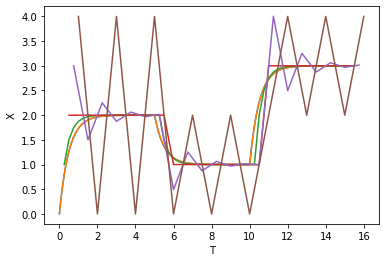

In [9]:
plt3 = sns.lineplot(x="T", y="X", data=df1) #blue
plt4 = sns.lineplot(x="T", y="X", data=df2) #Orange
plt5 = sns.lineplot(x="T", y="X", data=df3) #Green
plt6 = sns.lineplot(x="T", y="X", data=df4) #Red
plt7 = sns.lineplot(x="T", y="X", data=df5) #Purple
plt8 = sns.lineplot(x="T", y="X", data=df6) #Purple

## Error evaluation against step size

In [10]:
data2 = {'H = 0.001':x_save1,'Time(H = 0.001)':t_save1}
df2= pd.DataFrame(data2)
data2_1 = {'H(Exact)0.001':x_exact_save1}
df2_1 = pd.DataFrame(data2_1)
data3 = {'H = 0.01':x_save2,'Time(H = 0.01)':t_save2}
df3= pd.DataFrame(data3)
data3_1 = {'H(Exact)0.01':x_exact_save2}
df3_1 = pd.DataFrame(data3_1)
data4= {'H = 0.25':x_array3,'Time(H = 0.25)':t_array3}
df4= pd.DataFrame(data4)
data4_1 = {'H(Exact)0.25':x_exact_array3}
df4_1 = pd.DataFrame(data4_1)
data5= {'H = 0.5':x_array4,'Time(H = 0.5)':t_array4}
df5= pd.DataFrame(data5)
data5_1 = {'H(Exact)0.5':x_exact_array4}
df5_1 = pd.DataFrame(data5_1)
data6= {'H = 0.75':x_array5,'Time(H = 0.75)':t_array5}
df6= pd.DataFrame(data6)
data6_1 = {'H(Exact)0.75':x_exact_array5}
df6_1 = pd.DataFrame(data6_1)
data7= {'H = 1':x_array6,'Time(H = 1)':t_array6}
df7= pd.DataFrame(data7)
data7_1 = {'H(Exact)0.75':x_exact_array6}
df7_1 = pd.DataFrame(data7_1)
frames = [df2,df2_1, df3,df3_1,df4,df4_1,df5,df5_1,df6,df6_1,df7,df7_1]
result = pd.concat(frames, axis=1, sort=False)
result

,H = 0.001,Time(H = 0.001),H(Exact)0.001,H = 0.01,Time(H = 0.01),H(Exact)0.01,H = 0.25,Time(H = 0.25),H(Exact)0.25,H = 0.5,Time(H = 0.5),H(Exact)0.5,H = 0.75,Time(H = 0.75),H(Exact)0.75,H = 1,Time(H = 1),H(Exact)0.75
0,0.039642,0.01,1.019801,0.365854,0.1,1.181269,1.0000,0.25,1.393469,2.0,0.5,1.632121,3.0000,0.75,1.776870,4.0,1.0,1.864665
1,0.078498,0.02,1.039211,0.664784,0.2,1.329680,1.5000,0.50,1.632121,2.0,1.0,1.864665,1.5000,1.50,1.950213,0.0,2.0,1.981684
2,0.116584,0.03,1.058235,0.909031,0.3,1.451188,1.7500,0.75,1.776870,2.0,1.5,1.950213,2.2500,2.25,1.988891,4.0,3.0,1.997521
3,0.153915,0.04,1.076884,1.108599,0.4,1.550671,1.8750,1.00,1.864665,2.0,2.0,1.981684,1.8750,3.00,1.997521,0.0,4.0,1.999665
4,0.190506,0.05,1.095163,1.271661,0.5,1.632121,1.9375,1.25,1.917915,2.0,2.5,1.993262,2.0625,3.75,1.999447,4.0,5.0,1.999955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2.999902,14.96,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,2.999904,14.97,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,2.999906,14.98,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,2.999908,14.99,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
result.to_csv("Step_sizes2.csv")

## Error evaluation for step size

In [12]:
path = "Step_sizes1.csv"
df = pd.read_csv(path, encoding = 'utf-8')
df

,Unnamed: 0,H = 0.001,Time(H = 0.001),H(Exact)0.001,H = 0.01,Time(H = 0.01),H(Exact)0.01,H = 0.25,Time(H = 0.25),H(Exact)0.25,...,H(Exact)0.75.1,Unnamed: 19,Unnamed: 20,2,4.5,5.5,5.01,Unnamed: 25,4.99,5.1
0,0,0.039642,0.01,1.019801,0.365854,0.1,1.181269,1.0000,0.25,1.393469,...,1.864665,NaN,NaN,THIS ABOVE IS COLUMN NUMBER,condition,condition,NaN,NaN,4.90,5.10
1,1,0.078498,0.02,1.039211,0.664784,0.2,1.329680,1.5000,0.50,1.632121,...,1.981684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.75,5.25
2,2,0.116584,0.03,1.058235,0.909031,0.3,1.451188,1.7500,0.75,1.776870,...,1.997521,NaN,NaN,STEP VALUE,TIME = 5,EXACT VALUE,ERROR,NaN,NaN,NaN
3,3,0.153915,0.04,1.076884,1.108599,0.4,1.550671,1.8750,1.00,1.864665,...,1.999665,NaN,Step =0.5,2,5,1.9999546,4.54,NaN,NaN,NaN
4,4,0.190506,0.05,1.095163,1.271661,0.5,1.632121,1.9375,1.25,1.917915,...,1.999955,NaN,Step =0.75,2.015625,5.25,1.999972464,1565.2536,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,2.999902,14.96,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,1496,2.999904,14.97,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,1497,2.999906,14.98,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,1498,2.999908,14.99,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean Data

In [13]:
cleaned = df.iloc[[9,10,11,3,4,5],[20,21,22,23,24]]
cleaned

,Unnamed: 20,2,4.5,5.5,5.01
9,Step = 0.001,1.999910105,5,1.9999546,-4.4495
10,Step =0.01,1.999917952,5,1.9999546,-3.6648
11,Step = 0.25,1.999998093,5,1.9999546,4.3493
3,Step =0.5,2,5,1.9999546,4.54
4,Step =0.75,2.015625,5.25,1.999972464,1565.2536
5,Step = 1,4,5,1.9999546,200004.54


In [14]:
errors_y_axis = cleaned.iloc[:,-1]
errors_y_axis
error_y = []
for a in errors_y_axis:
    error_y.append(float(a))

### Graphed data

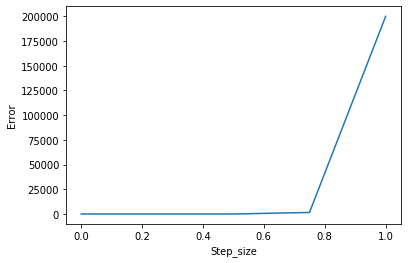

In [15]:
#6 data points...
error_y
error_step_x_axis = [0.001,0.01,0.25,0.5,0.75,1]
#data6= {'X':x_array6,'T':t_array6}
error_df = {'Error':error_y,'Step_size':error_step_x_axis}
err_plt = pd.DataFrame(error_df)
plot = sns.lineplot(x="Step_size", y="Error", data=err_plt) 

# Part 2: Random Noise using Box Muller Method

## Initialise/Compute standard deviation and mean

In [16]:
import statistics as stat
std_dev1 = stat.stdev(x_array1)   #calculate standard deviation of input array
_mean1 = stat.mean(x_array1)      #calculate mean of input array

std_dev = 0.0431                  #set custom standard deviation
_mean = 0.5                       #set custom mean
print("deviation: ",std_dev,"mean: ",_mean,"DEVIATION: ",std_dev1,"MEAN: ",_mean1)

deviation:  0.0431 mean:  0.5 DEVIATION:  0.7789244866974134 MEAN:  1.900142980914039


## compute box muller algorithm

In [17]:
def box_muller(array,standard_deviation,mean):
    random_vls = []
    i = 0
    it = 0                    #switches between the 2 random numbers generated
    box_1 = []                #saves value from one of the numbers generated
    box_2 = []                #saves values from the other number generated
    while i < len(array):     #while its not end of the input array
        if(it == 0):
            z1 =  rand.uniform(0,2*np.pi)       #generate random number between 0 and 2 * pi
            b  =  standard_deviation*np.sqrt(-2*math.log(rand.uniform(0,1)))     
            z2 =  b*(math.sin(z1))+mean
            z3 =  b*(math.cos(z1))+mean
            box_1.append(z2)
            noise = array[i] + z2
            random_vls.append(noise)
            it = 1
            i = i + 1
        else:
            it = 0
            box_2.append(z3)
            noise = array[i] + z3
            random_vls.append(noise)
            i= i + 1
    return random_vls,box_1,box_2

In [18]:
random_vals = []
random_vals,b1,b2 = box_muller(x_save2,std_dev,_mean)
noise_data= {'Noise_x':random_vals}
noise_df= pd.DataFrame(noise_data)
noise_df.to_csv("Noise_x.csv")

## Noise plot

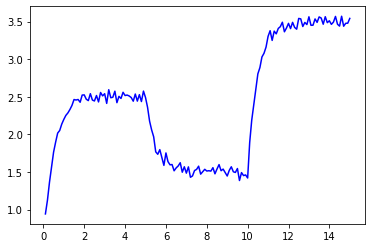

In [19]:
y = random_vals
x = t_save2
plt.plot(x,y,"b") #actual
plt.show()

## Proof that numbers generated fall within a gaussian distribution

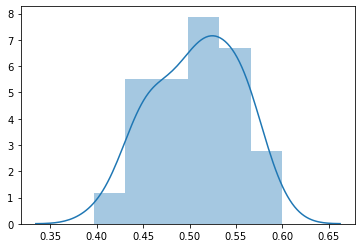

In [20]:
sns.distplot(b1)

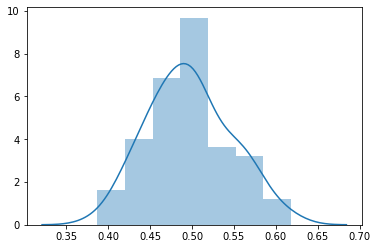

In [21]:
sns.distplot(b2)

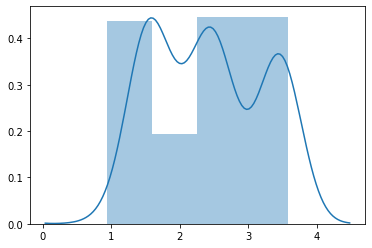

In [22]:
sns.distplot(random_vals)

# Part 3: Adding an intelligent agent to track the noise

## Sigmoid Activation

In [121]:
def sigmoid_activation(val):
    sigmoid = 1/(1+np.exp(-val))#sigmoid activation function
    return sigmoid

def train_weights3(array, lr, loops):
    weights3 = [0.1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)]#weights initialisation
    #weights3 = preprocessing.normalize(weights3)
    weights3_1 = []         #save weights
    itr_array = []          #saves number of epochs done
    sum_error_array = []    #saves sum_error generated per epoch
    Accuracy_array = []
    Accuracy_out = []
    for loop in range(loops):               #for each epoch in epochs
        net_array = []                      #saves network predictions
        error_array = []                    #saves error
        sum_error = 0.0                     #a variable that keeps track of error generated
        c = 0                               #counter for initialising
        w_adaptor = 0                       #used to iterate through saved weights in order to update them
        if loop < 1:                        #if its less than one epoch, create new weights and append them to an array
            for a in array:                 #for each input in input array
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])  #append new weights to empty weight array
                prediction, netwrk_sum = predict3(a,weights3)                         #predict function for sigmoid network
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = (Target - prediction)  #calculate error of the prediction
                error = delta
                Accuracy = accuracy(Target, prediction)
                Accuracy_array.append(Accuracy)
                error_array.append(error)    #save error
                net_array.append(prediction) #save network
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -lr*a[0]*(delta)          #calculate weight change for bias
                weights3[0] = weights3[0] + weights3_change_bias #add weight change calculated to current bias
                weights3_change= -lr*a[0]*(delta)                #calculate weight change for input weights
                for i in range(len(a)):                          #iterate over every input weight
                    weights3[i + 1] = weights3[i +1] + weights3_change     #update each input weight
                sum_error += error**2                            #calculate sum error
                c = c + 1                                        #increase counter
            Average_accuracy = np.average(Accuracy_array)
            Accuracy_out.append(Average_accuracy)
            #Average_accuracy = int(sum(Accuracy_array))/len(Accuracy_array)
            print('>epoch=%d, lrate=%.3f, error=%.3f,sum_error=%.3f,accuracy=%.3f' % (loop, lr, error, sum_error,Average_accuracy))
            sum_error_array.append(sum_error)                    #append sum_error
            itr_array.append(loop)                                #append iteration
        else:
            for a in array:
                prediction, netwrk_sum = predict3(a,weights3_1[w_adaptor]) #calculate prediction based on created weights
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = (Target - prediction)        #calculate error change
                error = delta 
                #print(error)
                Accuracy = accuracy(Target, prediction)
                #print("Accuracy",Accuracy)
                Accuracy_array[c] = Accuracy
                error_array.append(error)          #append error
                net_array.append(prediction)       #append network prediction 
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -lr*a[0]*(delta)  #calculate weight change for bias
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias #add weight change to current bias
                weights3_change= -lr*a[0]*(delta)   #calculate weight change
                for i in range(len(a)):            #iterate through each input
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change #for each input weight add weight change
                sum_error += error**2          #calculate error squared
                c = c + 1                      #increment counter
                w_adaptor = w_adaptor + 1      #increment weight adaptor
            Average_accuracy = np.average(Accuracy_array)
            Accuracy_out.append(Average_accuracy)
            #Average_accuracy = int(sum(Accuracy_array))/len(Accuracy_array)
            print('>epoch=%d, lrate=%.3f, error=%.3f,sum_error=%.3f,accuracy=%.3f' % (loop, lr, error, sum_error,Average_accuracy))
            sum_error_array.append(sum_error)  #append error
            itr_array.append(loop)             #append iteration
    return net_array,error_array,weights3_1,sum_error_array,itr_array,Accuracy_out
            
def predict3(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0] #obtain bias from weight array
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i] #multiply input by respective weight to obtain a summation
    activation2 = sigmoid_activation(net_sum)  #implement sigmoid function to summation obtained
    return activation2, net_sum                #return activation and network sum

#normalize data and feed into tuple
def triple_converter(array):                   #converts input into a tuple so that we can pass 3 input weights per prediction
    triple_array = []
    c = 0 #counter
    while c < len(array):
        if c == 0:
            triple_array.append([0,0,array[c]])
        elif c == 1:
            triple_array.append([0,array[c],array[c-1]])
        else:
            triple_array.append([array[c],array[c-1],array[c-2]])
        c = c + 1                              #increment counter
    return triple_array


##----------------------------------------ACCURACY CALCULATOR--------------------------------------##
def accuracy(Target, Predicted):
    Expected = abs(Target - Predicted)
    Example = Target - Expected
    result = Example/Target * 100
    return result


## Step function activation

In [24]:
##--------------------------------SINGLE PERCEPTRON-----------------------------------------------##
def predict_step(noise1,weights1):
    net_sum = 0                                #net_sum initialise
    out = 0                                    #initialise output of step function
    net_sum = weights1[0]                      #grab bias from weights and set as current net_sum 
    for i in range(len(noise1)-1):             #for every input
        net_sum += weights1[i + 1] * noise1[i] #multiply each input to weight and add result to netsum
    if net_sum > 1: #if netsum is greater than 1                        
        out = 1     #set output of step to 1
    else:           #else
        out = 0     #set output to 0
    return out      #return output

def train_weights_step(array, lr, loops):
    weights3 = [1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)] #initialise weights
    weights3_1 = []             #append/save created weights
    itr_array = []
    sum_error_array = []
    for loop in range(loops):   #for each epoch in epochs
        net_array = []          #append network values
        error_array = []        #append error array
        sum_error = 0.0         #keep track of sum_error
        c = 0                   #counter variable
        w_adaptor = 0           #weight counter(used to iterate through each value in weights array)
        if loop < 1:            #if its less than one epoch, create new weights and append them to an array
            for a in array:     #for each input in array input
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]]) #append weights created
                prediction = predict_step(a,weights3)                                #grab weights created and predict
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction      #calculate error
                error = delta
                error_array.append(error)        #append error
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0]*lr*error           #calculate weight change for bias
                weights3[0] = weights3[0] + weights3_change_bias#add calculated weight change to bias
                weights3_change= -a[0]*lr*error                 #calculate weight change for inputs
                for i in range(len(a)):                         #for each input in input array
                    weights3[i + 1] = weights3[i +1] + weights3_change #obtain respective weight and add it with the weight change
                sum_error += error**2            #calculate sum_error
                c = c + 1                        #increment counter
            sum_error_array.append(sum_error)
            itr_array.append(loop)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
        else:                               #if epoch is > 1
            for a in array:                 #for each input in input array
                prediction = predict_step(a,weights3_1[w_adaptor]) #calculate predictions using weights from previous epoch
                if c == 0:
                    Target = a[2]
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = prediction - Target #calculate error
                error = delta
                error_array.append(error)   #append error
                net_array.append(prediction)#append predictions
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change_bias = -a[0] *lr*(error) #calulate weight change for bias
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias #update bias weight in the saved weights array
                weights3_change= -a[0]*(error)*lr       #calculate weight change for weights in input
                for i in range(len(a)):                 #for each input in input array
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change #update respective weights in weights array
                sum_error += error**2                   #calculate sum_error
                c = c + 1                               #increment counter
                w_adaptor = w_adaptor + 1               #increment weight counter
            itr_array.append(loop)
            sum_error_array.append(sum_error)
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
    return net_array,sum_error_array,weights3_1,itr_array

# Implement weights function(sigmoid)

In [25]:
def implement_weights3(array,weights):
    net_array = []
    error_array = []
    sum_error = 0.0
    w_adaptor = 0
    for a in array: #loop through each input in array
        prediction, netwrk_sum = predict3(a,weights[w_adaptor]) #grab saved weight and predict
        net_array.append(prediction)   #append prediction
        Target = a[0]                  #current input
        error = Target - prediction    #error calculation
        error_array.append(error)      #append error
        sum_error += error**2          #calculate sum_error
        w_adaptor = w_adaptor + 1      #increment weight counter
    print('>error=%.3f,sum_error=%.3f' % (error, sum_error))
    return net_array,sum_error
            
def predict3(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i]
    activation2 = sigmoid_activation(net_sum)
    return activation2, net_sum
#x_save2

## Train network using sigmoid

### normalize data

In [135]:
norm = np.linalg.norm(random_vals)
normal_array = random_vals/norm

In [136]:
dat1 = triple_converter(random_vals)
#dat2 = preprocessing.normalize(dat1)
dat2 = triple_converter(normal_array)


In [123]:
#norm = np.linalg.norm(random_vals)
#normal_array = random_vals/norm
#print(normal_array)

In [146]:
values,e,w,test,itrArray,accuracy_array = train_weights3(dat2, 0.01,1000)
#0.006531

>epoch=0, lrate=0.010, error=-0.443,sum_error=32.503,accuracy=-577.716
>epoch=1, lrate=0.010, error=-0.443,sum_error=32.503,accuracy=-577.716
>epoch=2, lrate=0.010, error=-0.443,sum_error=32.517,accuracy=-577.847
>epoch=3, lrate=0.010, error=-0.443,sum_error=32.531,accuracy=-577.978
>epoch=4, lrate=0.010, error=-0.443,sum_error=32.546,accuracy=-578.110
>epoch=5, lrate=0.010, error=-0.443,sum_error=32.560,accuracy=-578.241
>epoch=6, lrate=0.010, error=-0.444,sum_error=32.574,accuracy=-578.373
>epoch=7, lrate=0.010, error=-0.444,sum_error=32.588,accuracy=-578.504
>epoch=8, lrate=0.010, error=-0.444,sum_error=32.602,accuracy=-578.635
>epoch=9, lrate=0.010, error=-0.444,sum_error=32.617,accuracy=-578.767
>epoch=10, lrate=0.010, error=-0.444,sum_error=32.631,accuracy=-578.898
>epoch=11, lrate=0.010, error=-0.444,sum_error=32.645,accuracy=-579.030
>epoch=12, lrate=0.010, error=-0.445,sum_error=32.659,accuracy=-579.162
>epoch=13, lrate=0.010, error=-0.445,sum_error=32.674,accuracy=-579.293
>e

>epoch=216, lrate=0.010, error=-0.477,sum_error=35.699,accuracy=-606.500
>epoch=217, lrate=0.010, error=-0.477,sum_error=35.715,accuracy=-606.636
>epoch=218, lrate=0.010, error=-0.477,sum_error=35.731,accuracy=-606.773
>epoch=219, lrate=0.010, error=-0.477,sum_error=35.746,accuracy=-606.909
>epoch=220, lrate=0.010, error=-0.477,sum_error=35.762,accuracy=-607.045
>epoch=221, lrate=0.010, error=-0.477,sum_error=35.777,accuracy=-607.182
>epoch=222, lrate=0.010, error=-0.478,sum_error=35.793,accuracy=-607.318
>epoch=223, lrate=0.010, error=-0.478,sum_error=35.809,accuracy=-607.455
>epoch=224, lrate=0.010, error=-0.478,sum_error=35.824,accuracy=-607.591
>epoch=225, lrate=0.010, error=-0.478,sum_error=35.840,accuracy=-607.728
>epoch=226, lrate=0.010, error=-0.478,sum_error=35.855,accuracy=-607.865
>epoch=227, lrate=0.010, error=-0.478,sum_error=35.871,accuracy=-608.001
>epoch=228, lrate=0.010, error=-0.479,sum_error=35.887,accuracy=-608.138
>epoch=229, lrate=0.010, error=-0.479,sum_error=35.

>epoch=328, lrate=0.010, error=-0.495,sum_error=37.485,accuracy=-621.908
>epoch=329, lrate=0.010, error=-0.495,sum_error=37.501,accuracy=-622.047
>epoch=330, lrate=0.010, error=-0.495,sum_error=37.518,accuracy=-622.186
>epoch=331, lrate=0.010, error=-0.495,sum_error=37.534,accuracy=-622.325
>epoch=332, lrate=0.010, error=-0.496,sum_error=37.550,accuracy=-622.464
>epoch=333, lrate=0.010, error=-0.496,sum_error=37.567,accuracy=-622.602
>epoch=334, lrate=0.010, error=-0.496,sum_error=37.583,accuracy=-622.741
>epoch=335, lrate=0.010, error=-0.496,sum_error=37.599,accuracy=-622.880
>epoch=336, lrate=0.010, error=-0.496,sum_error=37.616,accuracy=-623.019
>epoch=337, lrate=0.010, error=-0.496,sum_error=37.632,accuracy=-623.158
>epoch=338, lrate=0.010, error=-0.497,sum_error=37.648,accuracy=-623.297
>epoch=339, lrate=0.010, error=-0.497,sum_error=37.665,accuracy=-623.436
>epoch=340, lrate=0.010, error=-0.497,sum_error=37.681,accuracy=-623.575
>epoch=341, lrate=0.010, error=-0.497,sum_error=37.

>epoch=504, lrate=0.010, error=-0.524,sum_error=40.457,accuracy=-646.624
>epoch=505, lrate=0.010, error=-0.525,sum_error=40.474,accuracy=-646.767
>epoch=506, lrate=0.010, error=-0.525,sum_error=40.492,accuracy=-646.909
>epoch=507, lrate=0.010, error=-0.525,sum_error=40.509,accuracy=-647.051
>epoch=508, lrate=0.010, error=-0.525,sum_error=40.527,accuracy=-647.193
>epoch=509, lrate=0.010, error=-0.525,sum_error=40.544,accuracy=-647.335
>epoch=510, lrate=0.010, error=-0.525,sum_error=40.562,accuracy=-647.477
>epoch=511, lrate=0.010, error=-0.526,sum_error=40.579,accuracy=-647.619
>epoch=512, lrate=0.010, error=-0.526,sum_error=40.597,accuracy=-647.761
>epoch=513, lrate=0.010, error=-0.526,sum_error=40.614,accuracy=-647.903
>epoch=514, lrate=0.010, error=-0.526,sum_error=40.632,accuracy=-648.045
>epoch=515, lrate=0.010, error=-0.526,sum_error=40.649,accuracy=-648.188
>epoch=516, lrate=0.010, error=-0.526,sum_error=40.667,accuracy=-648.330
>epoch=517, lrate=0.010, error=-0.527,sum_error=40.

>epoch=692, lrate=0.010, error=-0.557,sum_error=43.848,accuracy=-673.589
>epoch=693, lrate=0.010, error=-0.557,sum_error=43.866,accuracy=-673.734
>epoch=694, lrate=0.010, error=-0.557,sum_error=43.885,accuracy=-673.878
>epoch=695, lrate=0.010, error=-0.557,sum_error=43.904,accuracy=-674.023
>epoch=696, lrate=0.010, error=-0.557,sum_error=43.922,accuracy=-674.168
>epoch=697, lrate=0.010, error=-0.557,sum_error=43.941,accuracy=-674.312
>epoch=698, lrate=0.010, error=-0.558,sum_error=43.960,accuracy=-674.457
>epoch=699, lrate=0.010, error=-0.558,sum_error=43.978,accuracy=-674.602
>epoch=700, lrate=0.010, error=-0.558,sum_error=43.997,accuracy=-674.747
>epoch=701, lrate=0.010, error=-0.558,sum_error=44.016,accuracy=-674.892
>epoch=702, lrate=0.010, error=-0.558,sum_error=44.034,accuracy=-675.036
>epoch=703, lrate=0.010, error=-0.558,sum_error=44.053,accuracy=-675.181
>epoch=704, lrate=0.010, error=-0.559,sum_error=44.072,accuracy=-675.326
>epoch=705, lrate=0.010, error=-0.559,sum_error=44.

>epoch=883, lrate=0.010, error=-0.589,sum_error=47.504,accuracy=-701.408
>epoch=884, lrate=0.010, error=-0.590,sum_error=47.523,accuracy=-701.555
>epoch=885, lrate=0.010, error=-0.590,sum_error=47.543,accuracy=-701.701
>epoch=886, lrate=0.010, error=-0.590,sum_error=47.563,accuracy=-701.848
>epoch=887, lrate=0.010, error=-0.590,sum_error=47.582,accuracy=-701.994
>epoch=888, lrate=0.010, error=-0.590,sum_error=47.602,accuracy=-702.141
>epoch=889, lrate=0.010, error=-0.590,sum_error=47.622,accuracy=-702.287
>epoch=890, lrate=0.010, error=-0.591,sum_error=47.641,accuracy=-702.434
>epoch=891, lrate=0.010, error=-0.591,sum_error=47.661,accuracy=-702.580
>epoch=892, lrate=0.010, error=-0.591,sum_error=47.681,accuracy=-702.727
>epoch=893, lrate=0.010, error=-0.591,sum_error=47.701,accuracy=-702.873
>epoch=894, lrate=0.010, error=-0.591,sum_error=47.720,accuracy=-703.020
>epoch=895, lrate=0.010, error=-0.592,sum_error=47.740,accuracy=-703.166
>epoch=896, lrate=0.010, error=-0.592,sum_error=47.

In [147]:
#save to dataframe
#data6= {'Noise_values':dat1,'Output of Perceptron':values,'Error':e,'T':t_save2}
#df6= pd.DataFrame(data6)

## Implementation during training

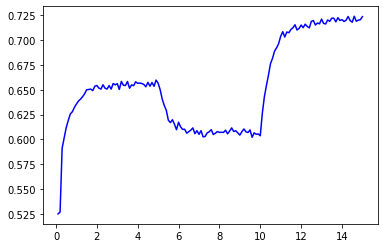

In [149]:
y_axis = values #network output
#y = normal_array
x_axis = x = t_save2
#plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Weights implementation on unseen but similar data

In [104]:
dat1 = triple_converter(x_save2)
net_array,sum_error_array = implement_weights3(dat1,w) #use trained weights(w) on unseen data
weights_data= {'Weights_data':w}
weights_df= pd.DataFrame(weights_data)
weights_df.to_csv("Sigmoid_Network_weights.csv")

sig_act: 0.7310585786300049
sig_act: 0.7494413487249857
sig_act: 0.8316265617349792
sig_act: 0.8515154947642499
sig_act: 0.8665286422175419
sig_act: 0.878111029351358
sig_act: 0.8870244175588902
sig_act: 0.8941438261567627
sig_act: 0.8996143196026224
sig_act: 0.9040278922031402
sig_act: 0.907654560832077
sig_act: 0.910649829365242
sig_act: 0.9130960812969711
sig_act: 0.9151283320456812
sig_act: 0.9168237518533192
sig_act: 0.9184364112556509
sig_act: 0.9197785142247343
sig_act: 0.9209803068334887
sig_act: 0.9218287709640237
sig_act: 0.9227795013413945
sig_act: 0.9237497455020993
sig_act: 0.9245008169103573
sig_act: 0.9250190030909212
sig_act: 0.9258471878682574
sig_act: 0.9264838140959812
sig_act: 0.9269085072761579
sig_act: 0.9276302341212176
sig_act: 0.9279829912754983
sig_act: 0.9285986873547661
sig_act: 0.9291115100980135
sig_act: 0.9297673787463299
sig_act: 0.9299482082220113
sig_act: 0.9306109018609701
sig_act: 0.9311075325614359
sig_act: 0.9314075267983932
sig_act: 0.932111137799

## Network ouput on unseen data(blue)

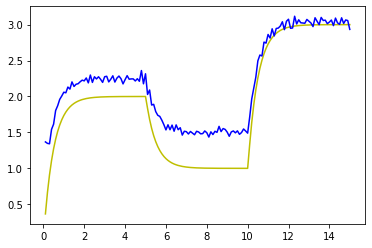

In [89]:
y_axis = net_array #network output
y = x_save2
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

### Error plot per iteration

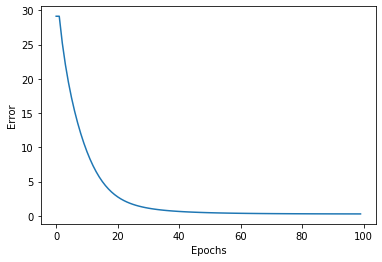

In [77]:
error_dataframe = {'Error':test,'Epochs':itrArray}
error_df = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df) #blue

## Accuracy plot

In [33]:
len(test)

100

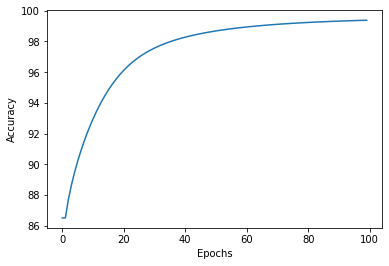

In [78]:
error_dataframe = {'Accuracy':accuracy_array,'Epochs':itrArray}
error_df = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Accuracy", data=error_df) #blue

## Dataframe containing noise values, trained values and error

In [35]:
df6

,H = 0.75,Time(H = 0.75)
0,3.000000,0.75
1,1.500000,1.50
2,2.250000,2.25
3,1.875000,3.00
4,2.062500,3.75
5,1.968750,4.50
6,2.015625,5.25
7,0.492188,6.00
8,1.253906,6.75
9,0.873047,7.50


## Train network using step function

### First 1000 epochs

In [119]:
dat1 = preprocessing.normalize(dat1)
dat1

values1,error_step,weights_step,itr, = train_weights_step(dat1, 0.01,1000)
weights_data= {'Weights_data':weights_step}
weights_df= pd.DataFrame(weights_data)
weights_df.to_csv("Step_Network_weights.csv")

>epoch=0, lrate=0.010, error=-0.416, , sum_error=27.031
>epoch=1, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=2, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=3, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=4, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=5, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=6, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=7, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=8, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=9, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=10, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=11, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=12, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=13, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=14, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=15, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=16, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=17, lrate=0.010, error=0.416, , sum_error=27.031
>

>epoch=156, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=157, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=158, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=159, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=160, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=161, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=162, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=163, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=164, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=165, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=166, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=167, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=168, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=169, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=170, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=171, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=172, lrate=0.010, error=0.416, , sum_error=27.031
>epoch=173, lrate=0.010, error=

>epoch=299, lrate=0.010, error=0.416, , sum_error=33.513
>epoch=300, lrate=0.010, error=0.416, , sum_error=32.719
>epoch=301, lrate=0.010, error=0.416, , sum_error=34.131
>epoch=302, lrate=0.010, error=0.416, , sum_error=32.920
>epoch=303, lrate=0.010, error=0.416, , sum_error=33.957
>epoch=304, lrate=0.010, error=0.416, , sum_error=34.380
>epoch=305, lrate=0.010, error=0.416, , sum_error=31.274
>epoch=306, lrate=0.010, error=0.416, , sum_error=34.657
>epoch=307, lrate=0.010, error=0.416, , sum_error=32.896
>epoch=308, lrate=0.010, error=0.416, , sum_error=34.235
>epoch=309, lrate=0.010, error=0.416, , sum_error=33.580
>epoch=310, lrate=0.010, error=0.416, , sum_error=33.904
>epoch=311, lrate=0.010, error=0.416, , sum_error=34.323
>epoch=312, lrate=0.010, error=0.416, , sum_error=34.154
>epoch=313, lrate=0.010, error=0.416, , sum_error=34.892
>epoch=314, lrate=0.010, error=0.416, , sum_error=34.239
>epoch=315, lrate=0.010, error=0.416, , sum_error=33.652
>epoch=316, lrate=0.010, error=

>epoch=446, lrate=0.010, error=-0.584, , sum_error=37.191
>epoch=447, lrate=0.010, error=0.416, , sum_error=35.935
>epoch=448, lrate=0.010, error=0.416, , sum_error=37.965
>epoch=449, lrate=0.010, error=-0.584, , sum_error=36.196
>epoch=450, lrate=0.010, error=0.416, , sum_error=37.624
>epoch=451, lrate=0.010, error=-0.584, , sum_error=36.966
>epoch=452, lrate=0.010, error=0.416, , sum_error=36.542
>epoch=453, lrate=0.010, error=-0.584, , sum_error=38.442
>epoch=454, lrate=0.010, error=0.416, , sum_error=35.102
>epoch=455, lrate=0.010, error=0.416, , sum_error=37.240
>epoch=456, lrate=0.010, error=-0.584, , sum_error=37.004
>epoch=457, lrate=0.010, error=0.416, , sum_error=36.953
>epoch=458, lrate=0.010, error=-0.584, , sum_error=36.502
>epoch=459, lrate=0.010, error=0.416, , sum_error=37.659
>epoch=460, lrate=0.010, error=0.416, , sum_error=37.263
>epoch=461, lrate=0.010, error=-0.584, , sum_error=36.678
>epoch=462, lrate=0.010, error=0.416, , sum_error=37.130
>epoch=463, lrate=0.010,

>epoch=600, lrate=0.010, error=-0.584, , sum_error=35.207
>epoch=601, lrate=0.010, error=0.416, , sum_error=37.786
>epoch=602, lrate=0.010, error=0.416, , sum_error=36.660
>epoch=603, lrate=0.010, error=-0.584, , sum_error=35.820
>epoch=604, lrate=0.010, error=0.416, , sum_error=38.892
>epoch=605, lrate=0.010, error=-0.584, , sum_error=36.144
>epoch=606, lrate=0.010, error=0.416, , sum_error=37.734
>epoch=607, lrate=0.010, error=-0.584, , sum_error=36.117
>epoch=608, lrate=0.010, error=0.416, , sum_error=37.020
>epoch=609, lrate=0.010, error=0.416, , sum_error=37.276
>epoch=610, lrate=0.010, error=-0.584, , sum_error=36.198
>epoch=611, lrate=0.010, error=0.416, , sum_error=38.211
>epoch=612, lrate=0.010, error=-0.584, , sum_error=36.116
>epoch=613, lrate=0.010, error=0.416, , sum_error=37.576
>epoch=614, lrate=0.010, error=0.416, , sum_error=37.042
>epoch=615, lrate=0.010, error=-0.584, , sum_error=35.420
>epoch=616, lrate=0.010, error=0.416, , sum_error=38.071
>epoch=617, lrate=0.010,

>epoch=869, lrate=0.010, error=0.416, , sum_error=36.240
>epoch=870, lrate=0.010, error=-0.584, , sum_error=38.509
>epoch=871, lrate=0.010, error=0.416, , sum_error=36.777
>epoch=872, lrate=0.010, error=-0.584, , sum_error=35.817
>epoch=873, lrate=0.010, error=0.416, , sum_error=38.155
>epoch=874, lrate=0.010, error=-0.584, , sum_error=36.189
>epoch=875, lrate=0.010, error=0.416, , sum_error=37.811
>epoch=876, lrate=0.010, error=0.416, , sum_error=36.474
>epoch=877, lrate=0.010, error=-0.584, , sum_error=36.314
>epoch=878, lrate=0.010, error=0.416, , sum_error=37.352
>epoch=879, lrate=0.010, error=-0.584, , sum_error=37.099
>epoch=880, lrate=0.010, error=0.416, , sum_error=37.520
>epoch=881, lrate=0.010, error=0.416, , sum_error=36.159
>epoch=882, lrate=0.010, error=-0.584, , sum_error=37.469
>epoch=883, lrate=0.010, error=0.416, , sum_error=37.166
>epoch=884, lrate=0.010, error=-0.584, , sum_error=36.600
>epoch=885, lrate=0.010, error=0.416, , sum_error=37.088
>epoch=886, lrate=0.010,

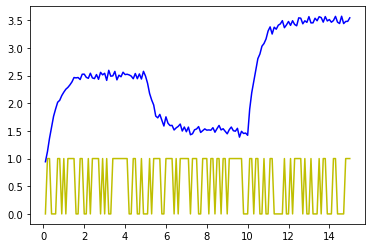

In [120]:

y_axis = random_vals #network output
#y_axis = norm
y = values1
x_axis = x = t_save2
plt.plot(x,y,"y") #robot
plt.plot(x_axis,y_axis,"b")#tracker
plt.show()


In [102]:
len(itr)

1000

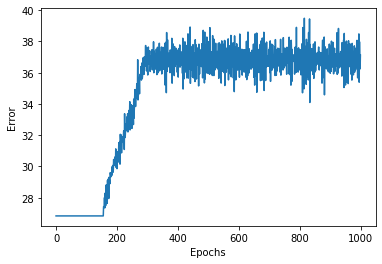

In [103]:
x = itr
y = error_step
error_dataframe = {'Error':y,'Epochs':x}
error_df = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df) #blue

### First 200 epochs

In [104]:
values1,error_step,weights_step,itr, = train_weights_step(dat1, 0.01,300)

>epoch=0, lrate=0.010, error=-0.423, , sum_error=26.825
>epoch=1, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=2, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=3, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=4, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=5, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=6, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=7, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=8, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=9, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=10, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=11, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=12, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=13, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=14, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=15, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=16, lrate=0.010, error=0.423, , sum_error=26.825
>epoch=17, lrate=0.010, error=0.423, , sum_error=26.825
>

>epoch=261, lrate=0.010, error=0.423, , sum_error=34.658
>epoch=262, lrate=0.010, error=0.423, , sum_error=35.275
>epoch=263, lrate=0.010, error=0.423, , sum_error=34.153
>epoch=264, lrate=0.010, error=0.423, , sum_error=35.214
>epoch=265, lrate=0.010, error=0.423, , sum_error=35.829
>epoch=266, lrate=0.010, error=0.423, , sum_error=35.211
>epoch=267, lrate=0.010, error=0.423, , sum_error=35.433
>epoch=268, lrate=0.010, error=0.423, , sum_error=36.229
>epoch=269, lrate=0.010, error=0.423, , sum_error=34.352
>epoch=270, lrate=0.010, error=0.423, , sum_error=36.284
>epoch=271, lrate=0.010, error=0.423, , sum_error=35.493
>epoch=272, lrate=0.010, error=0.423, , sum_error=35.295
>epoch=273, lrate=0.010, error=0.423, , sum_error=35.742
>epoch=274, lrate=0.010, error=0.423, , sum_error=36.450
>epoch=275, lrate=0.010, error=0.423, , sum_error=36.460
>epoch=276, lrate=0.010, error=0.423, , sum_error=34.741
>epoch=277, lrate=0.010, error=0.423, , sum_error=36.858
>epoch=278, lrate=0.010, error=

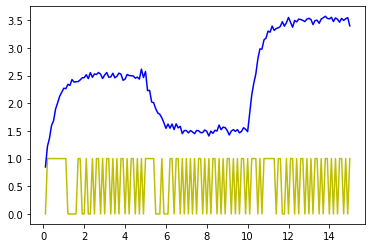

In [105]:
y_axis = random_vals #network output
y = values1
x_axis = x = t_save2
plt.plot(x,y,"y") #robot
plt.plot(x_axis,y_axis,"b")#tracker
plt.show()

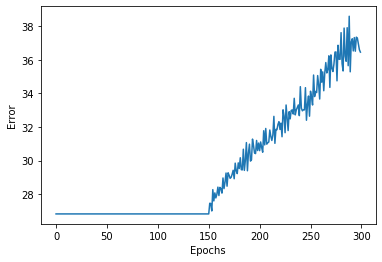

In [106]:
x = itr
y = error_step
error_dataframe = {'Error':y,'Epochs':x}
error_df = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df) #blue

# Perceptron model with different learning rates

#### Example 1(Learning rate =0.5)

In [43]:
random_vals1 = []
random_vals1,_,_ = box_muller(x_save2,std_dev,_mean) #call box muller
random_vals_t1 = []
random_vals_t1 = triple_converter(random_vals1) #convert input to tuple
values1,e1,w1,test1,itrArray1,_ = train_weights3(random_vals_t1, 0.5,40)

>epoch=0, lrate=0.500, error=inf,sum_error=inf,accuracy=-inf
>epoch=1, lrate=0.500, error=-inf,sum_error=inf,accuracy=-inf
>epoch=2, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=3, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=4, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=5, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=6, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=7, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=8, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=9, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=10, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=11, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=12, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=13, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=14, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=15, lrate=0.500, error=nan,sum_error=nan,accuracy=nan
>epoch=16, lrate=0.500, error=n

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


## Network representation

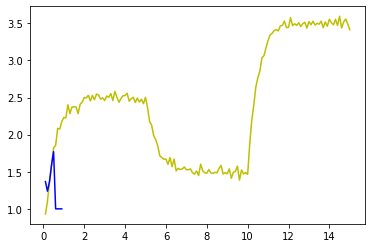

In [44]:
y_axis = values1 #network output
y = random_vals1 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation 

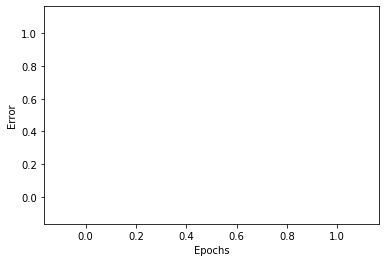

In [45]:
error_dataframe = {'Error':test1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

#### Example 2(learning rate = 0.2)

In [46]:
random_vals2 = []
random_vals2,_,_ = box_muller(x_save2,std_dev,_mean)
random_vals_t2 =[]
random_vals_t2 = triple_converter(random_vals2)
values1,e1,w1,test1,itrArray1,_ = train_weights3(random_vals_t2, 0.2,40)

>epoch=0, lrate=0.200, error=inf,sum_error=inf,accuracy=-inf
>epoch=1, lrate=0.200, error=-inf,sum_error=inf,accuracy=-inf
>epoch=2, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=3, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=4, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=5, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=6, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=7, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=8, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=9, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=10, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=11, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=12, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=13, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=14, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=15, lrate=0.200, error=nan,sum_error=nan,accuracy=nan
>epoch=16, lrate=0.200, error=n

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


## Network Representation

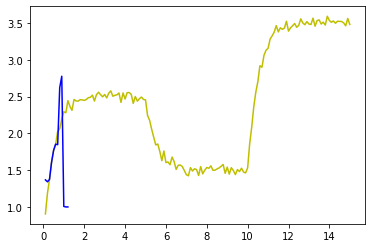

In [47]:
y_axis = values1 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

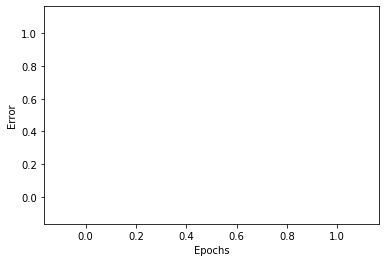

In [48]:
error_dataframe = {'Error':test1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue

#### Example 3(Learning rate = 0.01)

In [49]:
random_vals2 = []
random_vals2,_,_ = box_muller(x_save2,std_dev,_mean)
random_vals_t2 =[]
random_vals_t2 = triple_converter(random_vals2)
values1,e1,w1,test1,itrArray1,_= train_weights3(random_vals_t2, 0.01,40)

>epoch=0, lrate=0.010, error=inf,sum_error=inf,accuracy=-inf
>epoch=1, lrate=0.010, error=-inf,sum_error=inf,accuracy=-inf
>epoch=2, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=3, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=4, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=5, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=6, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=7, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=8, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=9, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=10, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=11, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=12, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=13, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=14, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=15, lrate=0.010, error=nan,sum_error=nan,accuracy=nan
>epoch=16, lrate=0.010, error=n

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


## Network Representation

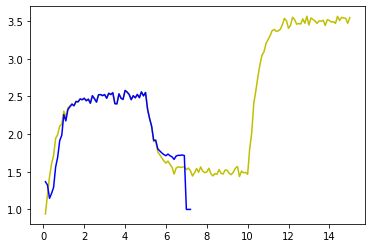

In [50]:
y_axis = values1 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

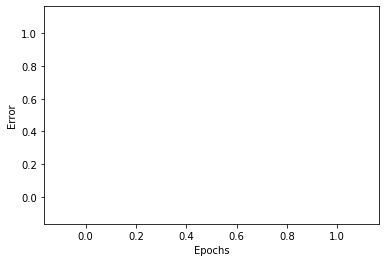

In [51]:
error_dataframe = {'Error':test1,'Epochs':itrArray1}
error_df1 = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df1) #blue